In [2]:
import json
import os
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("notebook")

In [3]:
from multiprocessing import Pool
from tqdm.auto import tqdm

def json2df(json_file):
    return pd.read_json('../suno/metadata/' + json_file, orient='index').T

filename = '../suno/metadata.pkl'
try:
    print('opening suno_df from pickle')
    suno_df = pd.read_pickle(filename)
    print(suno_df.shape)
except:
    print('creating suno_df from json files')
    suno_metadata_files = os.listdir('../suno/metadata/')
    print(f'metadata files: {len(suno_metadata_files)}')

    # suno_dfs = [pd.read_json('../suno/metadata/' + f, orient='index').T for f in suno_metadata_files[:]]
    # read json files with multiprocessing and store results in suno_dfs
    # use tqdm to show progress bar
    with Pool(16) as p:
        suno_dfs = list(tqdm(p.imap(json2df, suno_metadata_files), total=len(suno_metadata_files)))
    
    suno_df = pd.concat(suno_dfs).reset_index(drop=True)
    suno_df.to_pickle(filename)

suno_df

opening suno_df from pickle
creating suno_df from json files
metadata files: 83779


100%|██████████| 83779/83779 [00:31<00:00, 2695.68it/s]


,id,video_url,audio_url,image_url,image_large_url,is_video_pending,major_model_version,model_name,is_liked,user_id,...,stem_from_id,negative_tags,configurations,artist_clip_id,cover_clip_id,video_to_song_video_upload_id,video_to_song_video_upload_url,video_output_url,task,is_image_to_song
0,7a701166-3bcf-4168-b343-fd7390ee9f94,https://cdn1.suno.ai/7a701166-3bcf-4168-b343-f...,https://cdn1.suno.ai/7a701166-3bcf-4168-b343-f...,https://cdn2.suno.ai/image_7a701166-3bcf-4168-...,https://cdn2.suno.ai/image_large_7a701166-3bcf...,False,v3.5,chirp-v3,False,e769e9b0-2582-4464-b8c2-d77bc4fa2d45,...,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00002363-4eb5-4a9f-bfa7-c801c829f2d3,https://cdn1.suno.ai/00002363-4eb5-4a9f-bfa7-c...,https://cdn1.suno.ai/00002363-4eb5-4a9f-bfa7-c...,https://cdn2.suno.ai/image_00002363-4eb5-4a9f-...,https://cdn2.suno.ai/image_large_00002363-4eb5...,False,v3.5,chirp-v3,False,55930c10-6d7c-4f61-86de-450f2c90ccf3,...,None,,None,None,None,NaN,NaN,NaN,NaN,NaN
2,00005c16-cdf5-4f83-9c1b-65c6f9462872,https://cdn1.suno.ai/00005c16-cdf5-4f83-9c1b-6...,https://cdn1.suno.ai/00005c16-cdf5-4f83-9c1b-6...,https://cdn2.suno.ai/image_00005c16-cdf5-4f83-...,https://cdn2.suno.ai/image_large_00005c16-cdf5...,False,v3.5,chirp-v3,False,3329e77c-9565-4240-b5ea-29fb8c07e535,...,None,,None,None,None,None,None,None,None,None
3,00007e10-f985-4a0a-86b2-21ead5931104,https://cdn1.suno.ai/00007e10-f985-4a0a-86b2-2...,https://cdn1.suno.ai/00007e10-f985-4a0a-86b2-2...,https://cdn1.suno.ai/00007e10-f985-4a0a-86b2-2...,https://cdn1.suno.ai/00007e10-f985-4a0a-86b2-2...,False,v3,chirp-v3,False,aa0b9d1c-8ca0-49f4-a512-0ae7907d7486,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0001502a-0e37-4f0c-808c-291227190c93,https://cdn1.suno.ai/0001502a-0e37-4f0c-808c-2...,https://cdn1.suno.ai/0001502a-0e37-4f0c-808c-2...,https://cdn1.suno.ai/image_509f8fa0-fc75-4915-...,https://cdn1.suno.ai/image_large_509f8fa0-fc75...,False,v3,chirp-v3,False,05011d30-62f5-4f41-81db-f345023161ef,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83774,a8a9d496-dd1a-4997-aafb-6d164feeb04f,https://cdn1.suno.ai/a8a9d496-dd1a-4997-aafb-6...,https://cdn1.suno.ai/a8a9d496-dd1a-4997-aafb-6...,https://cdn1.suno.ai/image_baf81344-d461-4c00-...,https://cdn1.suno.ai/image_large_baf81344-d461...,False,v3,chirp-v3,False,ab97daaf-25ad-47cd-85ad-6099ea60b492,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83775,a8ab7f38-05ce-45e3-83f5-e05d59f1295f,https://cdn1.suno.ai/a8ab7f38-05ce-45e3-83f5-e...,https://cdn1.suno.ai/a8ab7f38-05ce-45e3-83f5-e...,https://cdn2.suno.ai/image_a8ab7f38-05ce-45e3-...,https://cdn2.suno.ai/image_large_a8ab7f38-05ce...,False,v3.5,chirp-v3,False,b691c5c0-4e0f-42e3-b268-98383de19f59,...,None,None,None,None,None,None,None,NaN,None,NaN
83776,a8acde82-c45b-4dfd-b1da-ca361299b8ad,https://cdn1.suno.ai/a8acde82-c45b-4dfd-b1da-c...,https://cdn1.suno.ai/a8acde82-c45b-4dfd-b1da-c...,https://cdn1.suno.ai/image_8a137e9c-e289-455e-...,https://cdn1.suno.ai/image_large_8a137e9c-e289...,False,v3.5,chirp-v3,False,9b3b0cec-594b-444b-ab39-34860e68a2f9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83777,a8adefaa-2832-4b56-a94e-933ae89e4126,https://cdn1.suno.ai/a8adefaa-2832-4b56-a94e-9...,https://cdn1.suno.ai/a8adefaa-2832-4b56-a94e-9...,https://cdn2.suno.ai/image_a8adefaa-2832-4b56-...,https://cdn2.suno.ai/image_large_a8adefaa-2832...,False,v3.5,chirp-v3,False,15163cc1-0eca-40a2-b932-8b8e9df66dfa,...,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
print(suno_df.columns)

Index(['id', 'video_url', 'audio_url', 'image_url', 'image_large_url',
       'is_video_pending', 'major_model_version', 'model_name', 'metadata',
       'is_liked', 'user_id', 'display_name', 'handle', 'is_handle_updated',
       'is_trashed', 'reaction', 'created_at', 'status', 'title', 'play_count',
       'upvote_count', 'is_public', 'tags', 'prompt', 'gpt_description_prompt',
       'audio_prompt_id', 'history', 'concat_history', 'type', 'duration',
       'refund_credits', 'stream', 'error_type', 'error_message',
       'avatar_image_url', 'infill', 'has_vocal',
       'is_audio_upload_tos_accepted', 'stem_from_id', 'negative_tags',
       'configurations'],
      dtype='object')


In [13]:
suno_df['major_model_version'].value_counts()

v3.5    39606
v3      23530
v2        332
          168
Name: major_model_version, dtype: int64

In [14]:
suno_df['model_name'].value_counts()

chirp-v3               63131
chirp-v2-xxl-alpha       326
                         168
chirp-v3.5                 5
chirp-v2-engine-v13        2
chirp-v2-engine-v12        2
chirp-v2-xxl-test          2
Name: model_name, dtype: int64

In [15]:
suno_df['has_vocal'].value_counts()

False    763
Name: has_vocal, dtype: int64

In [16]:
suno_df[['id','prompt','gpt_description_prompt','tags','negative_tags']]

,id,prompt,gpt_description_prompt,tags,negative_tags
0,00007e10-f985-4a0a-86b2-21ead5931104,\n\n\n\n[piano solo]\n[piano solo]\n\n\n[drum ...,None,"groovy electropop, lofi, melodic",NaN
1,0001502a-0e37-4f0c-808c-291227190c93,"[Intro]\nKau tahu, aku selalu berharap\nKau ba...",None,Pop Chill Sad Male,NaN
2,000201b3-1a93-4023-8b00-94b7c2a0b004,[Verse]\n我們這樣共同委身\n一起尋求上帝的光環\n把婚姻建立在堅實的基礎上\n經得...,None,"ballad, emo, pop, in mandarin",NaN
3,000364ba-26f7-44d5-9698-b75e322dc8a1,There is a paradise in your beautiful eyes \nM...,None,"acoustic guitar, pop, beat, electro, rock, ele...",NaN
4,0003f586-fd04-477c-b11c-b255269637ad,بهت قول میدم سخت نیست\nلااقل برای تو راحت باش\...,None,"guitar, bass, beat, pop",NaN
...,...,...,...,...,...
63631,8d4dda40-8322-4037-bed4-7071cc3f9018,PopUP PopUP PopUP PopUP PopUP PopUP PopUP PopU...,None,,None
63632,8d4fef02-e0a5-4f8a-a1d9-580ec00ee8d7,[Instrumental],big bands swing,energetic big band jazzy,None
63633,8d516aa4-b481-4fff-b159-5db358a75c0f,[Verse]\nバルーン持ってるよ\nカラフルで輝くぞ\n彼女の笑顔\nいつもとは違う\n...,A phonk song in Japanese about a girl who is h...,dark groovy phonk,None
63634,8d53d96c-7bc1-4226-b829-08b6b4fdec55,[Verse]\nFalling out of love so fast\nBroken h...,An electronic drum and bass song about a bad b...,electronic drum and bass uptempo,None


## language detection

In [17]:
import fasttext
from huggingface_hub import hf_hub_download

model_path = hf_hub_download(repo_id="facebook/fasttext-language-identification", filename="model.bin")
model = fasttext.load_model(model_path)
# model.predict(text)[0]

def detect_language(prompt, model):
    if prompt:
        return model.predict(prompt.replace('\n', ' '))[0][0].replace('__label__', '')
    else:
        return None

suno_df['language'] = suno_df['prompt'].apply(lambda x: detect_language(x, model))
suno_df.to_pickle('../suno/metadata.pkl')


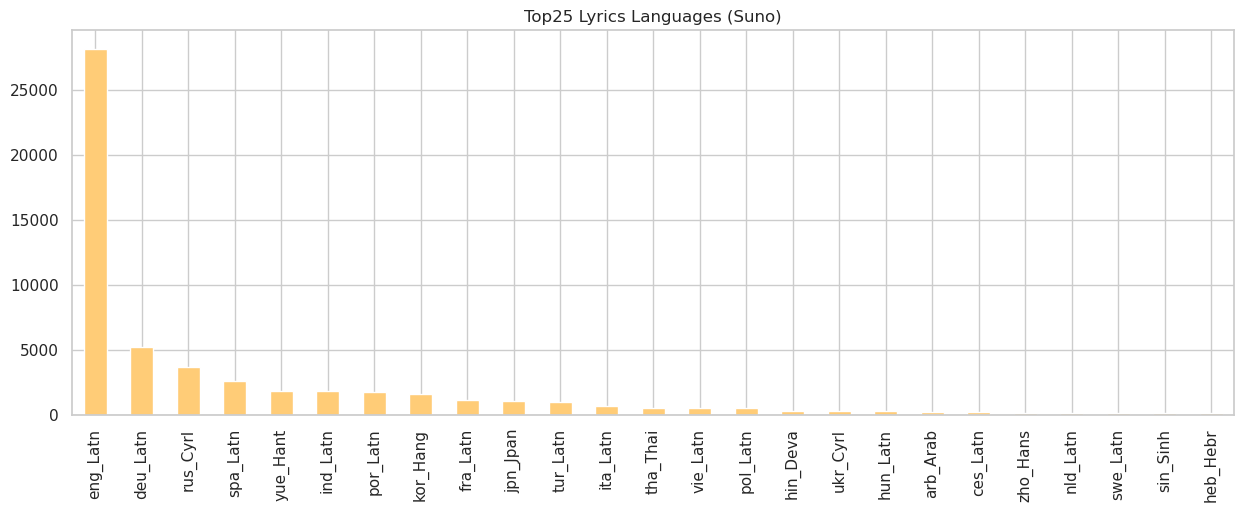

In [17]:
# df.language.hist()

# barplot with languages value counts
import matplotlib.pyplot as plt
suno_df.language.value_counts()[:25].plot(
    kind='bar',
    figsize=(15, 5),
    title='Top25 Lyrics Languages (Suno)',
    color='#fc7'
    )
plt.show()


In [20]:
# select rows where language starts with 'eng'

df = suno_df.dropna(subset=['language'])
df = df[df['language'].str.startswith('eng')]
df[['prompt']]

,prompt
3,There is a paradise in your beautiful eyes \nM...
6,[Intro]\nm-m-mm\no-o-oooo\n\n[verse 1]\nYester...
7,[Verse]\nIn Makhanda's golden sun\nWith dusty ...
8,"(Verse 1)\nOh, where did I park me boat, me he..."
15,(Verse 1)\nYou're like a melody stuck in my he...
...,...
63628,\n\n[Verse]\nSometimes I feel alone\nEmpty roa...
63629,[Verse]\nShining stars above the night\nWe tak...
63630,[Verse]\nLiving in the Bauwagen village\nSmall...
63634,[Verse]\nFalling out of love so fast\nBroken h...


In [21]:
from transformers import pipeline
classifier = pipeline(
    'zero-shot-classification', 
    model='facebook/bart-large-mnli',
    #model='roberta-large-mnli', 
    # model='microsoft/deberta-xlarge-mnli',
    )

sequence_to_classify = df.iloc[0]['prompt']

candidate_labels = ['parody','serious']
hypothesis_template = "These are the lyrics of a {} song."
res = classifier(
    sequence_to_classify, 
    candidate_labels, 
    # multi_label=True, # if more than one choice can be correct
    hypothesis_template=hypothesis_template
    )
# print(res)

for i in enumerate(res['labels']):
    print(f"{res['labels'][i[0]]}: {res['scores'][i[0]]}")

print(f'LYRICS:\n\n{sequence_to_classify}\n\n')

serious: 0.5277565717697144
parody: 0.4722434878349304
LYRICS:

There is a paradise in your beautiful eyes 
My eyes are for your eyes in the rainy night
My heart is the work of your hands
 Catch the darkness of your hair 
My heart misses you
 My lips are smiling

My heart is in prison
 Your cute eyes
My heart lost its voice
 Your breath is gone




# artist prompts 

In [13]:
import pandas as pd
# requires lxml
bsa = pd.read_html('https://en.wikipedia.org/wiki/List_of_best-selling_music_artists')
bsa = pd.concat(bsa[:6]).reset_index(drop=True)[['Artist']]
bsa

,Artist
0,The Beatles
1,Michael Jackson
2,Elvis Presley
3,Elton John
4,Madonna
...,...
117,Bob Marley
118,The Police
119,Barry Manilow
120,Kiss


In [14]:
df = pd.read_pickle('../suno/metadata.pkl')
print(df.columns)
df = df[['prompt','gpt_description_prompt','language']]

print(df.head(5))

def check_artist(row, artist_name, column):
    if row[column] is None:
        return False
    col = row[column].lower()
    if artist_name.lower() in col:
        return True
    else:
        return False

bsa['suno_prompts'] = bsa['Artist'].apply(lambda x: df.apply(lambda row: check_artist(row, x, 'prompt'), axis=1).sum())
bsa['suno_gpt_prompt'] = bsa['Artist'].apply(lambda x: df.apply(lambda row: check_artist(row, x, 'gpt_description_prompt'), axis=1).sum())

Index(['id', 'video_url', 'audio_url', 'image_url', 'image_large_url',
       'is_video_pending', 'major_model_version', 'model_name', 'metadata',
       'is_liked', 'user_id', 'display_name', 'handle', 'is_handle_updated',
       'is_trashed', 'reaction', 'created_at', 'status', 'title', 'play_count',
       'upvote_count', 'is_public', 'tags', 'prompt', 'gpt_description_prompt',
       'audio_prompt_id', 'history', 'concat_history', 'type', 'duration',
       'refund_credits', 'stream', 'error_type', 'error_message',
       'avatar_image_url', 'infill', 'has_vocal',
       'is_audio_upload_tos_accepted', 'stem_from_id', 'negative_tags',
       'configurations', 'language', 'serious/parody'],
      dtype='object')
                                               prompt  \
3   There is a paradise in your beautiful eyes \nM...   
6   [Intro]\nm-m-mm\no-o-oooo\n\n[verse 1]\nYester...   
7   [Verse]\nIn Makhanda's golden sun\nWith dusty ...   
8   (Verse 1)\nOh, where did I park me boat, me

In [15]:
bsa['sum'] = bsa['suno_prompts'] + bsa['suno_gpt_prompt']
bsa.sort_values('sum', ascending=False).head(50)

,Artist,suno_prompts,suno_gpt_prompt,sum
51,Journey,1865,25,1890
120,Kiss,1012,22,1034
74,Cher,727,36,763
5,Queen,497,23,520
52,Pink,112,11,123
59,Prince,110,10,120
16,Eagles,58,2,60
67,The Doors,39,0,39
110,Oasis,33,2,35
31,ABBA,16,4,20


In [89]:
suno_df = pd.read_pickle('../suno/metadata.pkl')

# suno_df[['prompt','tags','gpt_description_prompt','language']]
x = suno_df[suno_df['prompt'].str.lower().str.contains('madonna')].iloc[1]

print(
    f' id: {x.id}\n',
    f'title: {x.title}\n',
    f'audio_url: {x.audio_url}\n',
    f'tags: {x.tags}\n',
    f'gpt_description_prompt: {x.gpt_description_prompt}\n\n',
    f'prompt:\n------------------\n{x.prompt}\n',
)


 id: 53325c26-4842-433c-9534-885c32d345f4
 title: Hey, Soul Sister
 audio_url: https://cdn1.suno.ai/53325c26-4842-433c-9534-885c32d345f4.mp3
 tags: 16-bit rock, 16-bit post-hardcore, 16-bit, 16-bit lead
 gpt_description_prompt: None

 prompt:
------------------
[Intro]
Hey, hey, hey

[Verse 1]
Your lipstick stains
On the front lobe of my left-side brains
I knew I wouldn't forget you
And so I went and let you blow my mind
Your sweet moonbeam
The smell of you in every single dream I dream
I knew when we collided
You're the one I have decided who's one of my kind

[Chorus]
Hey, soul sister
Ain't that Mr. Mister on the radio, stereo?
The way you move ain't fair, you know
Hey, soul sister
I don't want to miss a single thing you do
Tonight

[Post-Chorus]
Hey, hey, hey


[Verse 2]
Just in time
I'm so glad you have a one-track mind like me
You gave my life direction
A game show love connection we can't deny
I'm so obsessed
My heart is bound to beat right out my untrimmed chest
I believe in you

In [58]:
suno_df[suno_df['id'] == 'c16c106c-8bf3-497c-8a14-e7f74f960659']

,id,video_url,audio_url,image_url,image_large_url,is_video_pending,major_model_version,model_name,metadata,is_liked,...,error_message,avatar_image_url,infill,has_vocal,is_audio_upload_tos_accepted,stem_from_id,negative_tags,configurations,language,serious/parody
27004,c16c106c-8bf3-497c-8a14-e7f74f960659,https://cdn1.suno.ai/c16c106c-8bf3-497c-8a14-e...,https://cdn1.suno.ai/c16c106c-8bf3-497c-8a14-e...,https://cdn1.suno.ai/image_c16c106c-8bf3-497c-...,https://cdn1.suno.ai/image_large_c16c106c-8bf3...,False,v3.5,chirp-v3,None,False,...,None,https://cdn1.suno.ai/defaultOrange.jpg,None,None,None,NaN,NaN,NaN,eng_Latn,"{'serious': 0.5138410925865173, 'parody': 0.48..."


In [5]:
import pandas as pd
suno_df = pd.read_pickle('../suno/metadata.pkl')
suno_df

,id,video_url,audio_url,image_url,image_large_url,is_video_pending,major_model_version,model_name,metadata,is_liked,...,error_message,avatar_image_url,infill,has_vocal,is_audio_upload_tos_accepted,stem_from_id,negative_tags,configurations,language,serious/parody
3,000364ba-26f7-44d5-9698-b75e322dc8a1,https://cdn1.suno.ai/000364ba-26f7-44d5-9698-b...,https://cdn1.suno.ai/000364ba-26f7-44d5-9698-b...,https://cdn1.suno.ai/image_000364ba-26f7-44d5-...,https://cdn1.suno.ai/image_large_000364ba-26f7...,False,v3.5,chirp-v3,None,False,...,None,None,None,None,None,NaN,NaN,NaN,eng_Latn,"{'serious': 0.5277565717697144, 'parody': 0.47..."
6,000673ea-a2a1-4412-bc23-beb063ff2e97,https://cdn1.suno.ai/000673ea-a2a1-4412-bc23-b...,https://cdn1.suno.ai/000673ea-a2a1-4412-bc23-b...,https://cdn1.suno.ai/image_1e3a767a-cd43-4994-...,https://cdn1.suno.ai/image_large_1e3a767a-cd43...,False,v3,chirp-v3,None,False,...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,eng_Latn,"{'serious': 0.5418151021003723, 'parody': 0.45..."
7,0006a07b-a26e-4457-9231-ab573a88351f,https://cdn1.suno.ai/0006a07b-a26e-4457-9231-a...,https://cdn1.suno.ai/0006a07b-a26e-4457-9231-a...,https://cdn1.suno.ai/image_0006a07b-a26e-4457-...,https://cdn1.suno.ai/image_large_0006a07b-a26e...,False,v3.5,chirp-v3,None,False,...,None,None,None,None,None,NaN,NaN,NaN,eng_Latn,"{'serious': 0.8353416323661804, 'parody': 0.16..."
8,000bd1f5-48c2-4fd9-9adf-b8a072cb8840,https://cdn1.suno.ai/000bd1f5-48c2-4fd9-9adf-b...,https://cdn1.suno.ai/000bd1f5-48c2-4fd9-9adf-b...,https://cdn1.suno.ai/image_4d443861-f02c-436e-...,https://cdn1.suno.ai/image_large_4d443861-f02c...,False,v3,chirp-v3,None,False,...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,eng_Latn,"{'parody': 0.590776264667511, 'serious': 0.409..."
15,000f1eb7-ccb7-483c-99a7-3c01081fe586,https://cdn1.suno.ai/000f1eb7-ccb7-483c-99a7-3...,https://cdn1.suno.ai/000f1eb7-ccb7-483c-99a7-3...,https://cdn1.suno.ai/image_141f56a5-221f-4e00-...,https://cdn1.suno.ai/image_large_141f56a5-221f...,False,v3,chirp-v3,None,False,...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,eng_Latn,"{'serious': 0.5572710633277893, 'parody': 0.44..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63628,8d4c14e8-2107-4605-87a7-57baf82b4778,https://cdn1.suno.ai/8d4c14e8-2107-4605-87a7-5...,https://cdn1.suno.ai/8d4c14e8-2107-4605-87a7-5...,https://cdn1.suno.ai/image_a2145227-0d56-4e21-...,https://cdn1.suno.ai/image_large_a2145227-0d56...,False,v3.5,chirp-v3,None,False,...,None,https://cdn1.suno.ai/defaultPink.jpg,None,False,True,None,None,None,eng_Latn,"{'serious': 0.7971696853637695, 'parody': 0.20..."
63629,8d4c772c-aacc-4da6-96ba-e97a899cf072,https://cdn1.suno.ai/8d4c772c-aacc-4da6-96ba-e...,https://cdn1.suno.ai/8d4c772c-aacc-4da6-96ba-e...,https://cdn2.suno.ai/image_8d4c772c-aacc-4da6-...,https://cdn2.suno.ai/image_large_8d4c772c-aacc...,False,v3.5,chirp-v3,None,False,...,None,https://cdn1.suno.ai/cf20f0a2.webp,None,None,None,None,None,None,eng_Latn,"{'serious': 0.6843413710594177, 'parody': 0.31..."
63630,8d4d21d8-17b0-4c41-bd09-78f896289d41,https://cdn1.suno.ai/8d4d21d8-17b0-4c41-bd09-7...,https://cdn1.suno.ai/8d4d21d8-17b0-4c41-bd09-7...,https://cdn2.suno.ai/image_8d4d21d8-17b0-4c41-...,https://cdn2.suno.ai/image_large_8d4d21d8-17b0...,False,v3.5,chirp-v3,None,False,...,None,https://cdn1.suno.ai/defaultOrange.webp,None,None,None,None,None,None,eng_Latn,"{'parody': 0.6240795850753784, 'serious': 0.37..."
63634,8d53d96c-7bc1-4226-b829-08b6b4fdec55,https://cdn1.suno.ai/8d53d96c-7bc1-4226-b829-0...,https://cdn1.suno.ai/8d53d96c-7bc1-4226-b829-0...,https://cdn2.suno.ai/image_8d53d96c-7bc1-4226-...,https://cdn2.suno.ai/image_large_8d53d96c-7bc1...,False,v3.5,chirp-v3,None,False,...,None,https://cdn1.suno.ai/defaultBlue.jpg,None,None,None,None,None,None,eng_Latn,"{'serious': 0.7477731704711914, 'parody': 0.25..."
